<a href="https://colab.research.google.com/github/Sion1225/Study-Deeplearning-NLP/blob/master/BIO_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="/content/drive/MyDrive/GitHub/Study-Deeplearning-NLP/DataSet/BIO_train.txt")

('/content/drive/MyDrive/GitHub/Study-Deeplearning-NLP/DataSet/BIO_train.txt',
 <http.client.HTTPMessage at 0x7f83a96e90d0>)

In [36]:
f = open("/content/drive/MyDrive/GitHub/Study-Deeplearning-NLP/DataSet/BIO_train.txt", 'r')
[f.readline() for i in range(30)]

['-DOCSTART- -X- -X- O\n',
 '\n',
 'EU NNP B-NP B-ORG\n',
 'rejects VBZ B-VP O\n',
 'German JJ B-NP B-MISC\n',
 'call NN I-NP O\n',
 'to TO B-VP O\n',
 'boycott VB I-VP O\n',
 'British JJ B-NP B-MISC\n',
 'lamb NN I-NP O\n',
 '. . O O\n',
 '\n',
 'Peter NNP B-NP B-PER\n',
 'Blackburn NNP I-NP I-PER\n',
 '\n',
 'BRUSSELS NNP B-NP B-LOC\n',
 '1996-08-22 CD I-NP O\n',
 '\n',
 'The DT B-NP O\n',
 'European NNP I-NP B-ORG\n',
 'Commission NNP I-NP I-ORG\n',
 'said VBD B-VP O\n',
 'on IN B-PP O\n',
 'Thursday NNP B-NP O\n',
 'it PRP B-NP O\n',
 'disagreed VBD B-VP O\n',
 'with IN B-PP O\n',
 'German JJ B-NP B-MISC\n',
 'advice NN I-NP O\n',
 'to TO B-PP O\n']

In [37]:
f.seek(0)

0

In [38]:
tagged_sentences = []
sentence = []

for line in f :
    if len(line)==0 or line.startswith("-DOCSTART") or line[0]=="\n" :
        if len(sentence) > 0 :
            tagged_sentences.append(sentence)
            sentence = []
            

    else :
        splits = line.split(' ')
        splits[-1] = re.sub(r'\n', '', splits[-1])
        word = splits[0].lower()
        sentence.append([word, splits[-1]])  

f.close()

[print(tagged_sentences[i], "\n") for i in range(3)]

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']] 

[['peter', 'B-PER'], ['blackburn', 'I-PER']] 

[['brussels', 'B-LOC'], ['1996-08-22', 'O']] 



[None, None, None]

In [39]:
print("Length of Samples: ", len(tagged_sentences))

Length of Samples:  14041


In [40]:
sentences, ner_tags = [], []

for tagged_sentence in tagged_sentences :
    sentence, tag_info = zip(*tagged_sentence) #unpacking
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

print(sentences[:3])
print(ner_tags[:3])

[['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.'], ['peter', 'blackburn'], ['brussels', '1996-08-22']]
[['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O'], ['B-PER', 'I-PER'], ['B-LOC', 'O']]


Maximum length of samples :  113
Average length of samples :  14.501887329962253
Minimum length of samples :  1


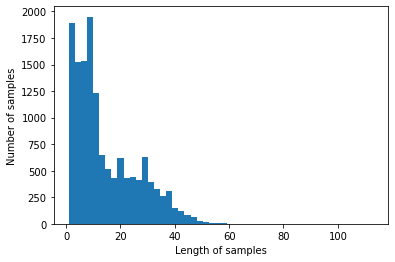

In [43]:
print("Maximum length of samples : ", max(len(sentence) for sentence in sentences))
print("Average length of samples : ", (sum(map(len,sentences))/len(sentences)))
print("Minimum length of samples : ", min(len(sentence) for sentence in sentences))

plt.hist([len(sentence) for sentence in sentences], bins=50)
plt.xlabel("Length of samples")
plt.ylabel("Number of samples")
plt.show()

In [64]:
temp = sum(sentences,[])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.', 'peter', 'blackburn', 'brussels', '1996-08-22', 'the', 'european', 'commission', 'said', 'on', 'thursday', 'it', 'disagreed', 'with', 'german', 'advice', 'to', 'consumers', 'to', 'shun', 'british', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow', 'disease', 'can', 'be', 'transmitted', 'to', 'sheep', '.', 'germany', "'s", 'representative', 'to', 'the', 'european', 'union', "'s", 'veterinary', 'committee', 'werner', 'zwingmann', 'said', 'on', 'wednesday', 'consumers', 'should', 'buy', 'sheepmeat', 'from', 'countries', 'other', 'than', 'britain', 'until', 'the', 'scientific', 'advice', 'was', 'clearer', '.', '"', 'we', 'do', "n't", 'support', 'any', 'such', 'recommendation', 'because', 'we', 'do', "n't", 'see', 'any', 'grounds', 'for', 'it', ',', '"', 'the', 'commission', "'s", 'chief', 'spokesman', 'nikolaus', 'van', 'der', 'pas', 'told', 'a', 'news', 'briefing', '.', 'he', 'said', 'further',

In [65]:
print(len(set(temp)))

21009


In [74]:
vocab_size = 5000

#Integer Encoding
src_tokenizer = Tokenizer(num_words=vocab_size, oov_token="OOV")
src_tokenizer.fit_on_texts(sentences)
print(src_tokenizer.word_index)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)
print(tar_tokenizer.word_index)

{'OOV': 1, 'the': 2, '.': 3, ',': 4, 'of': 5, 'in': 6, 'to': 7, 'a': 8, 'and': 9, '(': 10, ')': 11, '"': 12, 'on': 13, 'said': 14, "'s": 15, 'for': 16, '1': 17, '-': 18, 'at': 19, 'was': 20, '2': 21, '0': 22, '3': 23, 'with': 24, 'that': 25, 'he': 26, 'from': 27, 'it': 28, 'by': 29, 'is': 30, ':': 31, 'as': 32, '4': 33, 'had': 34, 'his': 35, 'has': 36, 'but': 37, 'an': 38, 'not': 39, 'were': 40, 'be': 41, 'after': 42, 'have': 43, 'first': 44, 'new': 45, 'who': 46, 'will': 47, 'they': 48, '5': 49, 'two': 50, 'u.s.': 51, 'been': 52, '$': 53, '--': 54, 'their': 55, 'beat': 56, 'are': 57, '6': 58, 'which': 59, 'would': 60, 'this': 61, 'up': 62, 'its': 63, 'year': 64, 'i': 65, 'last': 66, 'percent': 67, 'out': 68, 'we': 69, 'thursday': 70, 'one': 71, 'million': 72, 'over': 73, 'government': 74, 'wednesday': 75, 'police': 76, '7': 77, 'results': 78, 'against': 79, 'second': 80, 'when': 81, '/': 82, 'also': 83, 'tuesday': 84, 'three': 85, 'soccer': 86, 'president': 87, 'no': 88, 'division': 8

In [76]:
tag_size = len(tar_tokenizer.word_index) + 1
print("Size of vocabulary set : ", vocab_size)
print("Size of named entity : ", tag_size)

Size of vocabulary set :  5000
Size of named entity :  10


In [77]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [78]:
print("X_train[:3] : ",X_train[:3])
print("y_train[:3] : ",y_train[:3])

X_train[:3] :  [[989, 1, 205, 629, 7, 3939, 216, 1, 3], [774, 1872], [726, 150]]
y_train[:3] :  [[4, 1, 7, 1, 1, 1, 7, 1, 1], [3, 5], [2, 1]]
